## predict the median house price



### California census data to predict the median house price (median_house_value) for each block in California, based on factors like population, median income, etc

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
path = '/cxldata/datasets/project/housing/housing.csv'
housing = pd.read_csv(path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

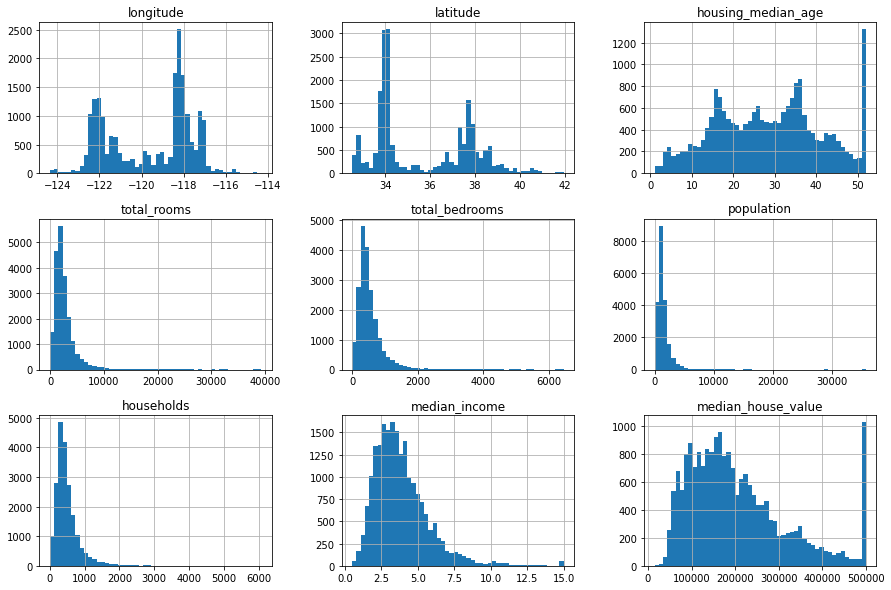

In [9]:
%matplotlib inline
housing.hist(bins = 50,figsize = (15,10))
# figsize- Size of the output figure.
# bins- Number of histogram bins to be used.

In [10]:
income_cat = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6.,20],labels=[1, 2, 3, 4, 5])
income_cat.head()

0    5
1    5
2    5
3    4
4    3
Name: median_income, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [11]:
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
split_object = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [13]:
gen_obj = split_object.split(housing,income_cat)

In [14]:
train_ind,test_ind = next(gen_obj)

In [15]:
len(test_ind)

4128

#### Generating test set- Locating data

In [16]:
strat_train_set = housing.loc[train_ind]
strat_test_set = housing.loc[test_ind]

####  Explore the Data to gain Insights.
will get into more depth for understanding the data. We'll use several exploration and visualization techniques for this purpose

create a copy of the training data before playing with it so that any changes made by us don't harm the training data

In [17]:
train_copy = strat_train_set.copy()

#### Visualizing geographical data

We have two attributes, latitude and longitude that tell us about the geographical information of the blocks.

We can create a scatterplot of all blocks to visualize the data. We can do that by using the DataFrame.plot() method of the pandas library. Its syntax is:

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

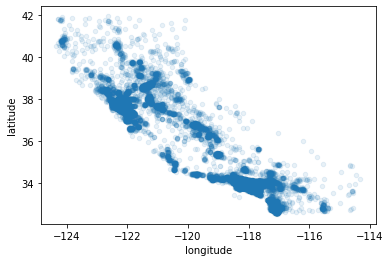

In [18]:
train_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

#### Visualizing the target variable

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

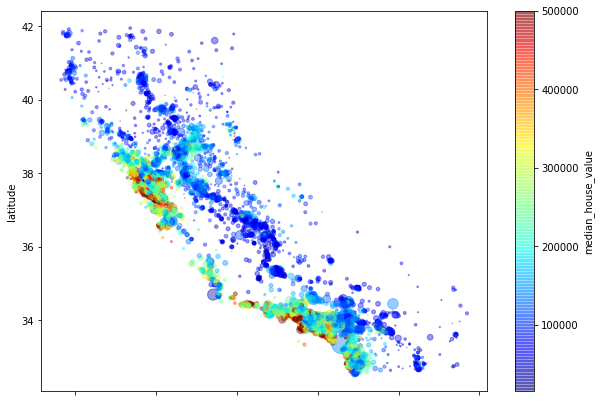

In [60]:
train_copy.plot(kind="scatter", x="longitude", y="latitude", 
                alpha=0.4, s=train_copy["population"]/100, 
                figsize=(10,7), c="median_house_value", 
                cmap=plt.get_cmap("jet"), 
                colorbar=True)

On observing the plot, we can easily conclude that the house prices are much related to the location and to the population density. We can see that houses inclined to the left side have higher prices. On doing some research, we find out that there is an ocean to the left and it is obvious that houses near the ocean will be costlier.

But it's not a general rule because we can see in the upper left corner, the house prices are low although they too are near the ocean

In [20]:
train_copy.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


#### Scatter Matrix
we can see that the attribute population has a highly positive correlation with attributes total_rooms, total_bedrooms, and households. This is also obvious because where there are more people, they'll require more rooms.

<b>Note:</b> 
Remember, correlation only tells us about the linear relationship between the variables. It being close to zero doesn't mean that there's no relationship between those variables. It only means that there is no linear relationship between the two variables. Although, there can be a non-linear relationship between them.

We can also visualize correlation with the <b> scatter_matrix()</b>

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='latitude', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='latitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <

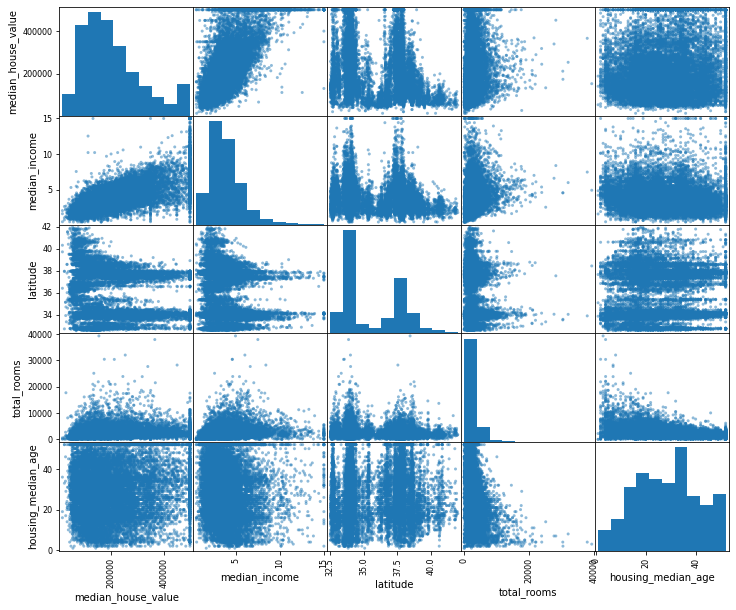

In [21]:
pd.plotting.scatter_matrix(train_copy[["median_house_value", "median_income","latitude", "total_rooms",
 "housing_median_age"]],figsize = (12,10))

### Attribute with the most correlation

On referring to both correlation matrix and scatter matrix, we can conclude that the most promising attribute to predict the <b>median_house_value</b> is the <b>median_income</b>

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

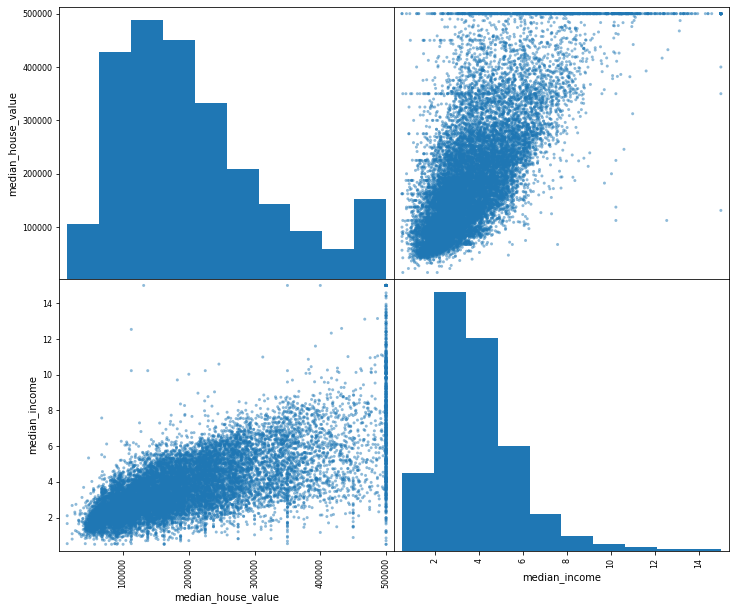

In [22]:
pd.plotting.scatter_matrix(train_copy[["median_house_value", "median_income"
                                       ]],figsize = (12,10))

#### Attribute combinations

ometimes, it may be the case that a single attribute is not very useful while prediction. For example, the total number of rooms in a block is not very useful if you don’t know how many households there are. So, in such cases, we create new attributes by combining two or more attributes.

Here, we create three new features, which are-

rooms_per_household - We divide the number of rooms in each block by its household value. It tells us on average how many rooms are there in a particular block per household.

bedrooms_per_room- We divide the number of bedrooms in each block by the number of rooms in that particular block. It tells us the average ratio of the number of bedrooms to the number of rooms in a particular block.

population_per_household - We divide the population of each block by its household value. It will tell us on average how many people live in a particular house in a block.

In [23]:
train_copy["rooms_per_household"] = train_copy["total_rooms"]/train_copy["households"]
train_copy["bedrooms_per_room"]  =train_copy["total_bedrooms"]/train_copy["total_rooms"]
train_copy["population_per_household"] = train_copy["population"]/train_copy["households"]

#### again compute the correlation matrix
for our DataFrame train_copy in the same way we computed before.

On looking into our new correlation matrix, we can see that the new bedrooms_per_room attribute is much more correlated with the median_house_value than the total number of rooms or bedrooms.

Also, rooms_per_household shows a slightly greater correlation with the target variable than the attributes total_rooms and households separately.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>],
       [<AxesSubplot:title={'center':'rooms_per_household'}>,
        <AxesSubplot:title={'center':'bedrooms_per_room'}>,
        <AxesSubplot:title={'center':'population_per_household'}>]],
      dtype=object)

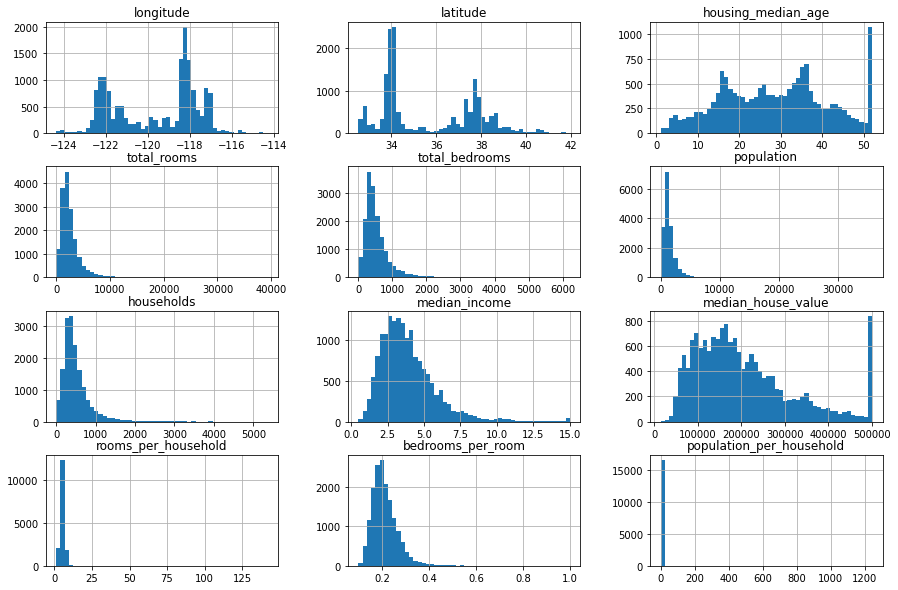

In [24]:
train_copy.corr()
train_copy.hist(bins = 50,figsize = (15,10))

### Prepare the Data for Machine Learning Algorithms

It is always advisable to write functions for this, instead of performing the task manually, because-

We can use these functions in our live system to transform the new data before feeding it to our algorithms.

We can use these functions to transform the fresh data (whenever we get it) easily so that we get to train the model further.

We can also use these functions in our future projects.

We can try various transformations easily and see which combination of transformations works best.

drop() method also has a very important parameter which is axis. We can specify  1 to drop column otherwise 0 to drop a row

But before preprocessing the data, let's separate the target variable and the features. We can do that by using the drop() method of the DataFrame object.
<b>we will start again working with our old clean training set i.e., strat_train_set</b>

In [25]:
train_data = strat_train_set.drop("median_house_value", axis=1)
housing_labels= strat_train_set['median_house_value'].copy()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


#### Missing values

We need to fix the missing value
We have already noticed earlier that one of the attributes i.e., total_bedrooms contains missing values, so let's fix this. We have three options-

<b>Drop the rows</b>-remove those rows which don't contain information about total_bedrooms

<b>Drop the columns</b>-We can try dropping the whole column containing missing values

<b>Set the missing value to some value</b>- we impute the missing values with some value. The value can be an arbitrary value such as 0, or the attribute's mean, median, mode, etc.

#### SimpleImputer

We'll use the SimpleImputer class from the impute submodule of sklearn for handling missing values

We have to first create an instance of it. It has a very important parameter to set, which is strategy. We can specify its value as mean for mean(which is also by default), median for median, most_frequent for mode, and constant for a constant value.


In [26]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(strategy="median")
housing_num = train_data.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)
out =imputer.fit_transform(housing_num)

#convert the output back to a pandas DataFrame
housing_tr =pd.DataFrame(out,columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


#### Handling categorical and text attributes

Convert the categories of the attribute <b>ocean_proximity</b> from text to numbers

 5 categories in ocean_proximity i.e., ( '*<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN*')
 We can assign numbers from 1 to 5 to each category. But that'll bring order in the attribute. That means category assigned 5 will have more value than category assigned 1. That'll also include the fact that two nearby values (suppose category 1 and 2) are more similar than two distant values (suppose category 1 and 4). This all doesn't make sense because we know that all categories of ocean_proximity are independent of each other and so we can't compare any two values. But how to tell this to a Machine Learning Algorithm?

One way can be to create one binary attribute per category. As we have 5 categories, there will be 5 attributes. Every attribute can contain either 1 or 0. For example, one attribute equals to 1 when the category is '<1H OCEAN', and other four attributes 0. In the same way, the other four attributes can be represented. This way of encoding the categorical variables is termed as <b> One Hot Encoding.</b>

For example, the categories can be encoded as-


'<1H OCEAN' - [1,0,0,0,0]

‘INLAND’ - [0,1,0,0,0]

‘ISLAND’ - [0,0,1,0,0]

‘NEAR BAY’ - [0,0,0,1,0]

‘NEAR OCEAN' - [0,0,0,0,1]

where, the vectors represent 5 attributes.

So, when ocean_proximity value of a district will be '<1H OCEAN', the first attribute will be 1 and the other four will be zeros. In the same way for ‘NEAR BAY’, value of the fourth attribute will be 1 and others will be zero.

This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes.

In [27]:
from sklearn.preprocessing  import OneHotEncoder 

In [28]:
encoder  = OneHotEncoder()
one_hot  = encoder.fit_transform(train_data[['ocean_proximity']])
one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

### Custom Transformers

Scikit-learn is one of the most widely used libraries in machine learning. Just think of a basic task regarding machine learning and search for it on the internet. Most probably you will find that there's a class or function already implemented in sklearn to perform that task. But what if it's not? What, if we want to perform that task in some other way?

In such cases, we'll have to create a transformer of our own. As we have seen, we have to perform several data transformation steps in the right order. So sklearn provides a Pipeline class to create a pipeline to execute all the steps in a sequential order. We use it a lot in machine learning. So, we have to make our custom transformer in a way such that it works seamlessly with sklearn functionalities such as Pipeline

For that, all we need to do is to create a class and implement three methods- fit(), transform(), and fit_transform(). For the last one, we only have to add TransformerMixin as a base class. Now, let's implement the other two.

We'll also add BaseEstimator as a base class as it gives us two extra methods get_params() and set_params() which help much in automatic hyperparameter tuning.




In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

In [30]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self 

    def transform(self, X, y=None):
        rooms_per_household = X[:, 3] / X[:, 6]
        population_per_household = X[:, 5] / X[:, 6]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]

            return np.c_[X, rooms_per_household, population_per_household, 
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [31]:
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(train_data.values)      

#### Feature scaling
Feature scaling is a preprocessing technique used in machine learning to normalize or standardize the range of independent variables (features) in your dataset. It ensures that all features contribute equally to the model's 
training, especially when they are measured in different units or have vastly different ranges.

There are two ways to make all attributes on the same scale.

1> min-max scaling :- In min-max scaling, all the values are shifted and rescaled so that they end up ranging between 0 to 1.
The minimum value in the original data becomes 0 in the normalized data,
and the maximum value in the original data becomes 1 in the normalized data

2> standardization :-
But standardization does not bound values to a specific range.

In the standardization, we scale the values by calculating how many standard deviations away the value is from the mean. In standardization, features are rescaled so that output has the properties of standard normal
Rescales the data to have a mean of 0 and a standard deviation of 1.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(housing_num)


#### Transformation Pipelines


sklearn provides a Pipeline class to create a pipeline to execute all the steps in sequential order

In [33]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

##### ColumnTransformer

In [34]:
from sklearn.compose import ColumnTransformer 

In [35]:
full_pipeline = ColumnTransformer([
                 ("num", num_pipeline, list(housing_num)),
                 ("cat", OneHotEncoder(), ["ocean_proximity"]),
                 ])


In [36]:
housing_prepared = full_pipeline.fit_transform(train_data)

### Exploring models

We'll use models already implemented in sklearn.
Create an instance of the Model

<b> model_name = Model(parameters)</b>

Model is the ML model or estimator which is a python class (for example, LinearRegression),

model_name is the name of the model or more clearly we can say that it is an instance of the class Model and

parameters are the parameters that are generally different for different models.

Then we use the fit() method on our instance model_name


<b> model_name.fit(X_train,y_train) </b>

X_train is the training dataset(attributes or predictors) 

y_train is the training labels(target variable).

In our case, X_train is housing_prepared and y_train is housing_labels. Remember this throughout the step.

<b> model_name.predict(X) </b>

where X is the predictors(attributes or features)


-----------------------------
lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

predictions = lin_reg.predict(housing_prepared)

predictions will be a numpy array containing predictions done by our model on the training dataset.

#### LinearRegression

In [37]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels) #Train the model on our training dataset i.e. (housing_prepared, housing_labels).
predictions = lin_reg.predict(housing_prepared) #Predict the target variable for our training predictors i.e. (housing_prepared)

##### Measuring error

Let's compare our actual and predicted values. We'll compare them for our first 5 data points.

Predicted values = [210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849, 189747.55849879]

Actual values = [286600.0, 340600.0, 196900.0,  46300.0, 254500.0]


We can notice that predictions are not good.

Let's measure the model's performance by calculating the error in our predictions using the metric RMSE (Root Mean Square Error) (which we have discussed before).

In [38]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, predictions,squared  = False)
lin_rmse

68628.19819848922

#### DecisionTreeRegressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
predictions = tree_reg.predict(housing_prepared)

tree_rmse = mean_squared_error(housing_labels, predictions,squared  = False)
tree_rmse

0.0

##### Overfitting

 So if you would have trained the model and measured the RMSE correctly, then its value will be 0.0. Also, when we compare the predicted and actual values for our first 5 data points we get

Actual values = [286600.0, 340600.0, 196900.0,  46300.0, 254500.0]

Predicted values = [286600.0, 340600.0, 196900.0,  46300.0, 254500.0]

how to check whether our model is overfitting or not ?

we need to do Cross Validation!!

##### Cross Validation

We use the cross_val_score() function from sklearn to perform cross-validation. It performs K-fold cross-validation.

What it does is that it splits our dataset into k distinct subsets also called folds. Then it trains and evaluates our model k times, picking a different subset for evaluation and using the rest of the k-1 subsets for training. The result is an array containing k evaluation scores

In [40]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

scores = abs(scores)

#### RandomForestRegressor


In [41]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
predictions = forest_reg.predict(housing_prepared)

forest_rmse = mean_squared_error(housing_labels, predictions,squared  = False)

scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
scores = abs(scores)

Observing Random Forests :
    
  forest_rmse as 18641.94835072352. You may have got some other value due to the stochastic nature of Random Forest. It is much better than our two previous models.

Also, I got the scores for RandomForestRegressor as-

array([49365.63140746, 47726.0382676 , 49823.27396708, 52361.60100788,
   49640.9498092, 53619.30260892, 49001.1816177, 47790.01251808,
   53163.0727864, 49998.12196605])
   
Note- You may have got different scores due to the stochastic nature of cross_val_score().

The mean and standard deviation of the scores comes as- (50248.91859563662, 1991.9110531037534).

This looks much more promising than our previous two models. However, our model is still overfitting because training RMSE is much less than mean validation RMSE. You can try tuning different hyperparameters of Random Forest or constrain it to reduce overfitting.

But before you dig deeper into the Random Forests, you should try out many other models from various categories of Machine Learning algorithms (like Support Vector Machines, possibly a neural network, etc.), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

#### Fine tune the model


While fine-tuning the model, we try out different combinations of its hyperparameters and select the combination which gives us the best performance. Different combinations may work out well for different datasets. We can do this manually but it is a tedious process. Hence we perform this task using GridSearchCV from sklearn.



#### GridSearchCV

GridSearchCV takes hyperparameters which we want to experiment with different values as input and evaluates all the possible combinations of the hyperparameters using cross-validation.

Suppose there is a model which has three hyperparameters a, b, and c. We want to try out our model on the hyperparameters values as- a = [8,16,32,64] b = [True, False] c = [1,2,3] and we specify cv to 5, then

GridSearchCV will try out 4 * 2 * 3 = 24 combinations. Some of the combinations will be - {a : 8, b: True, c:1}, {a : 16, b: True, c:1}, {a : 32, b: True, c:1}, {a : 8, b: True, c:2} and {a : 8, b: False, c:1}. And, as we have specified cv as 5, the total rounds of training will be 24 * 5 = 120. It means, our model will be trained 120 times. It may take a lot of time for training and this also limits us to try out a large number of combinations. Hence, we should do it carefully.

<b>GridSearchCV(estimator, param_grid, cv = None, scoring = None)</b>

estimator is our model instance,

param_grid is a dictionary that contains hyperparameter names as keys and their list of values which we want to try out as values of the dictionary,

cv is the cross-validation parameter (k in k-fold) and

scoring is our evaluation metric.

Then we can make it work by using the fit() method.

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
reg_forest = RandomForestRegressor()

grid_search = GridSearchCV(reg_forest, param_grid, cv = 5, scoring = 'neg_root_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

best_param = grid_search.best_params_

#### Evaluating the model on the test set

In [59]:
X_test  = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_model = grid_search.best_estimator_

final_predictions =final_model.predict(X_test_prepared)
print(final_predictions)

[477940.8        268253.33333333 231260.         ... 298670.06666667
 167756.66666667 142073.36666667]


RMSE for testing data comes to around 47000 , It is not a very good model but our task never was to build a good model but only to understand the flow of building a machine learning project

We not only judge the model's performance on basis of error but also on other factors such as-

1.In how much time it predicts the output for a data point in the real world?

2.Can it handle data of all possible distributions or not?

3.Can it be retrained easily on new data?

### Present the solution
Let's assume our model passes all the tests and is proven to perform better than the model currently in production. Hence, we proceed to the next step of our pipeline

### Launch, monitor and maintain the system
This is the final step of our pipeline. Also, it is a never-ending step as we have to continuously monitor and maintain the system. Although there are several tools for monitoring, still there may be cases when these tools fail and your intervention is needed